<a href="https://colab.research.google.com/github/lOmarMisbahl/ImageSegmentation/blob/main/ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from PIL import Image as PImage
from PIL import ImageColor as PColor
from random import randint
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans as ImplementedKMeans
from sklearn.cluster import SpectralClustering as SpectralClustering

In [ ]:
def DataLoading(ImagesPath,GroundTruthPath,MatrixDimensions):
    GroundTruthMatrix = []
    ImagesList = listdir(ImagesPath)
    ImagesMatrix = np.arange(MatrixDimensions[0] * MatrixDimensions[1]).reshape(MatrixDimensions)
    NumOfPixels = MatrixDimensions[0] // len(ImagesList)
    Dimensions = MatrixDimensions[1]
    Count = 0
    for Image in ImagesList:
        GroundTruth = scipy.io.loadmat(GroundTruthPath+Image[:-4])
        Img = PImage.open(ImagesPath+Image)
        ImagesMatrix[NumOfPixels*Count:NumOfPixels+(NumOfPixels*Count),:] = np.array(Img).reshape(NumOfPixels,Dimensions)
        for j in range(0,GroundTruth['groundTruth'].shape[1]):
            GroundTruthMatrix.append(GroundTruth['groundTruth'][0][j][0][0][0])
        Count += 1
    return ImagesMatrix,GroundTruthMatrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TrainPath = "/content/drive/MyDrive/data/images/train/"
GroundTruthPath = "/content/drive/MyDrive/data/ground_truth/train/"
NumOfPixels = 481*321
Dimensions = 3
NumOfImages=200
Train, GroundTruth = DataLoading(TrainPath,GroundTruthPath,(NumOfPixels*NumOfImages,Dimensions))

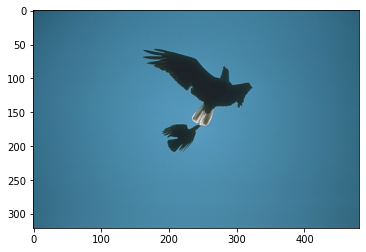

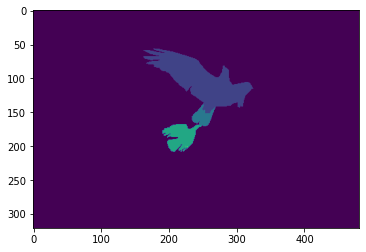

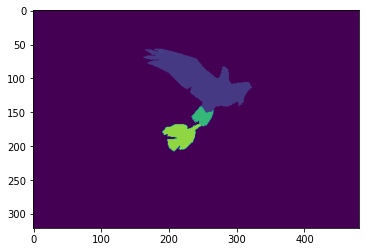

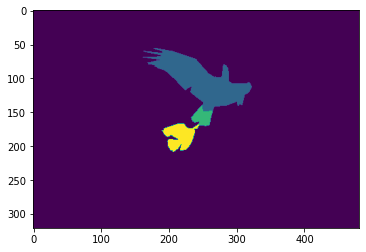

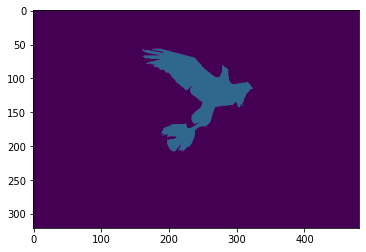

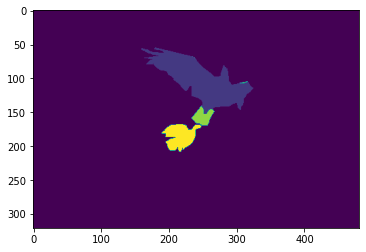

In [ ]:
plt.imshow(Train[0:NumOfPixels].reshape(321,481,3));
plt.figure();
plt.imshow(GroundTruth[0]);
plt.figure();
plt.imshow(GroundTruth[1]);
plt.figure();
plt.imshow(GroundTruth[2]);
plt.figure();
plt.imshow(GroundTruth[3]);
plt.figure();
plt.imshow(GroundTruth[4]);

In [ ]:
def Colorize(Clusters,Image,NumOfClusters):
    ColorizedImage= np.zeros(Image.shape,dtype=np.uint8)
    Colors = []
    for i in range(NumOfClusters):
        Colors.append(np.array([randint(0, 255),randint(0, 255),randint(0, 255)]))
    for i in range(Image.shape[0]):
        ColorizedImage[i] = Colors[Clusters[i]]
    return ColorizedImage

In [ ]:
def OwnKMeans(Data, NumOfClusters):
    NumberOfData = Data.shape[0]
    NumberOfFeatures = Data.shape[1]
    Mean = np.mean(Data, axis = 0)
    STD = np.std(Data, axis = 0)     
    Centroids = np.random.randn(NumOfClusters,NumberOfFeatures)*STD + Mean
    OldCentroids = np.zeros(Centroids.shape) 
    Clusters = np.zeros(NumberOfData)
    Distances = np.zeros((NumberOfData,NumOfClusters))
    for i in range(NumOfClusters):
        Distances[:,i] = np.linalg.norm(Data - Centroids[i], axis=1)
        Clusters = np.argmin(Distances, axis = 1)
        OldCentroids = deepcopy(Centroids)
        for i in range(NumOfClusters):
            Centroids[i] = np.mean(Data[Clusters == i], axis=0)
        
    return Clusters

In [ ]:
ColorizedImages = []
Clusters = []
for K in range(3,12,2):  
    for ImageNumber in range(5):
        Image = Train[NumOfPixels*ImageNumber:NumOfPixels+(NumOfPixels*ImageNumber)]
        #Model = OwnKMeans(Image,K)
        Model = ImplementedKMeans(n_clusters=K, random_state=0).fit(Image)
        Clusters.append(Model.labels_)
        ColorizedImages.append(Colorize(Model.labels_,Image,K))

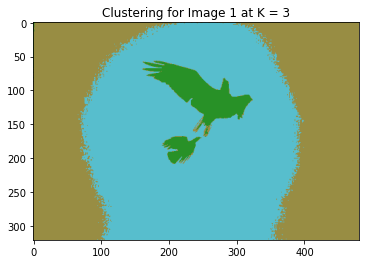

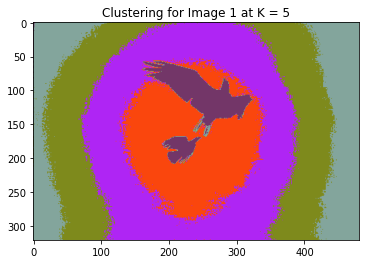

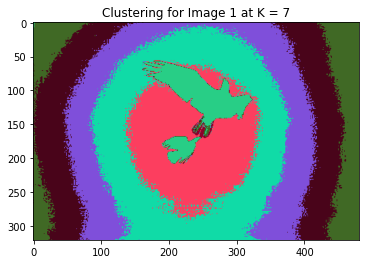

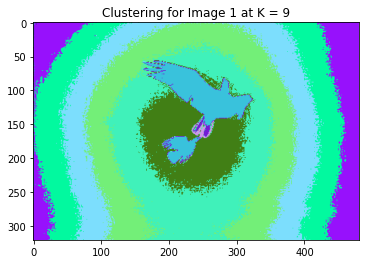

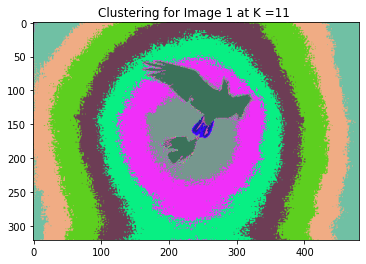

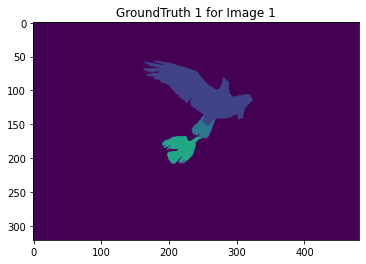

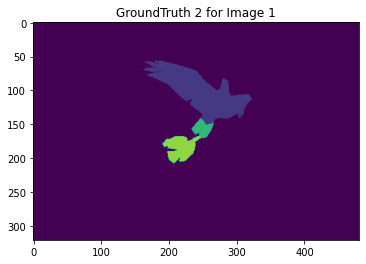

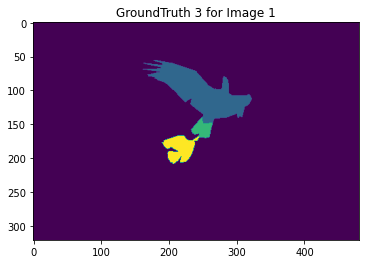

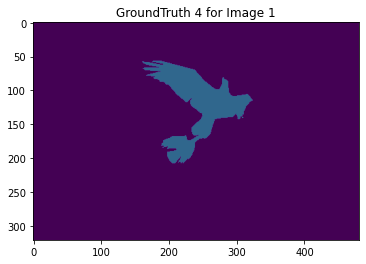

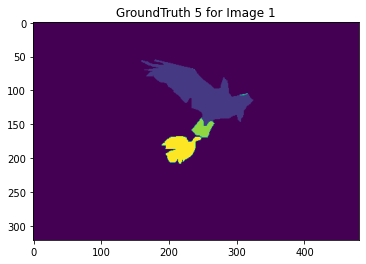

In [ ]:
plt.imshow(ColorizedImages[0].reshape(321,481,3));
plt.title("Clustering for Image 1 at K = 3");
plt.figure();
plt.imshow(ColorizedImages[5].reshape(321,481,3));
plt.title("Clustering for Image 1 at K = 5");
plt.figure();
plt.imshow(ColorizedImages[10].reshape(321,481,3));
plt.title("Clustering for Image 1 at K = 7");
plt.figure();
plt.imshow(ColorizedImages[15].reshape(321,481,3));
plt.title("Clustering for Image 1 at K = 9");
plt.figure();
plt.imshow(ColorizedImages[20].reshape(321,481,3));
plt.title("Clustering for Image 1 at K =11 ");
plt.figure();
plt.imshow(GroundTruth[0]);
plt.title("GroundTruth 1 for Image 1");
plt.figure();
plt.imshow(GroundTruth[1]);
plt.title("GroundTruth 2 for Image 1");
plt.figure();
plt.imshow(GroundTruth[2]);
plt.title("GroundTruth 3 for Image 1");
plt.figure();
plt.imshow(GroundTruth[3]);
plt.title("GroundTruth 4 for Image 1");
plt.figure();
plt.imshow(GroundTruth[4]);
plt.title("GroundTruth 5 for Image 1");

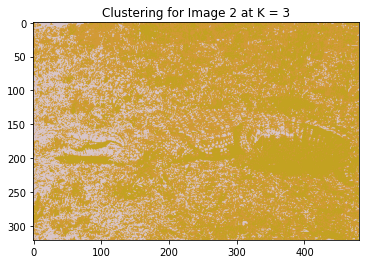

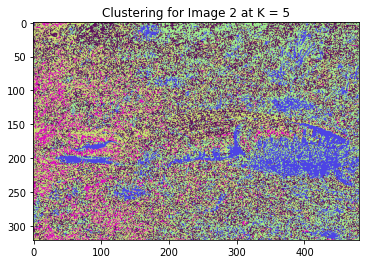

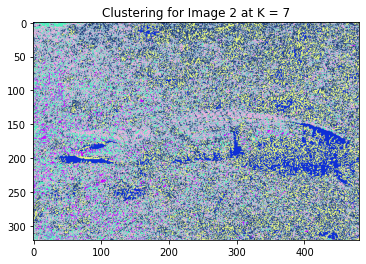

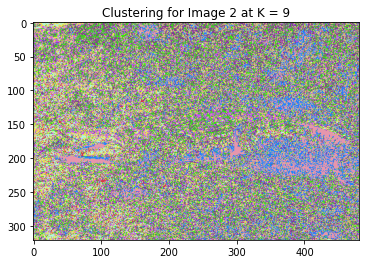

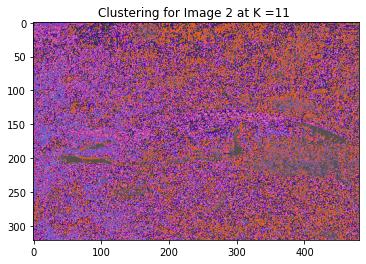

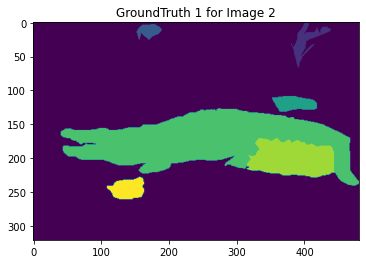

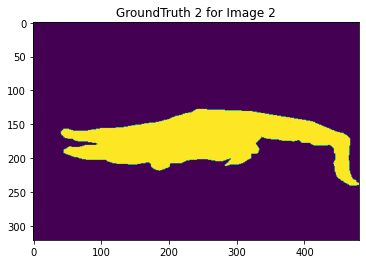

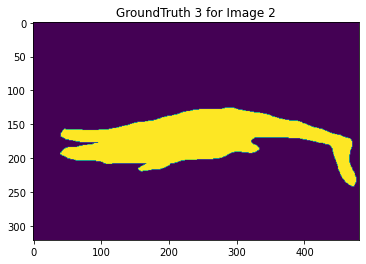

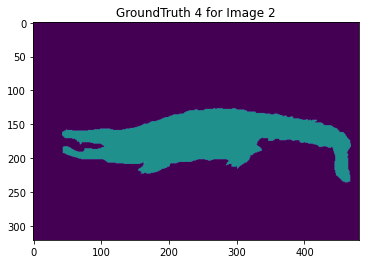

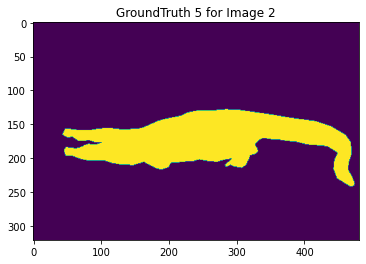

In [ ]:
plt.imshow(ColorizedImages[1].reshape(321,481,3));
plt.title("Clustering for Image 2 at K = 3");
plt.figure();
plt.imshow(ColorizedImages[6].reshape(321,481,3));
plt.title("Clustering for Image 2 at K = 5");
plt.figure();
plt.imshow(ColorizedImages[11].reshape(321,481,3));
plt.title("Clustering for Image 2 at K = 7");
plt.figure();
plt.imshow(ColorizedImages[16].reshape(321,481,3));
plt.title("Clustering for Image 2 at K = 9");
plt.figure();
plt.imshow(ColorizedImages[21].reshape(321,481,3));
plt.title("Clustering for Image 2 at K =11 ");
plt.figure();
plt.imshow(GroundTruth[5]);
plt.title("GroundTruth 1 for Image 2");
plt.figure();
plt.imshow(GroundTruth[6]);
plt.title("GroundTruth 2 for Image 2");
plt.figure();
plt.imshow(GroundTruth[7]);
plt.title("GroundTruth 3 for Image 2");
plt.figure();
plt.imshow(GroundTruth[8]);
plt.title("GroundTruth 4 for Image 2");
plt.figure();
plt.imshow(GroundTruth[9]);
plt.title("GroundTruth 5 for Image 2");

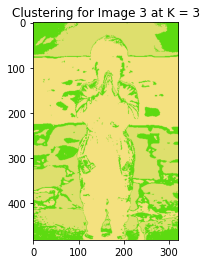

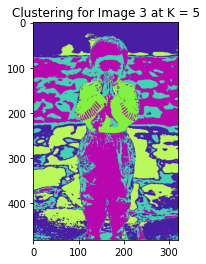

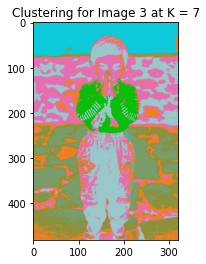

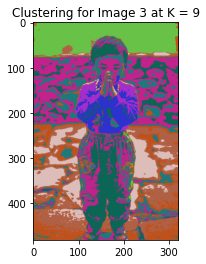

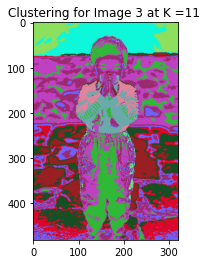

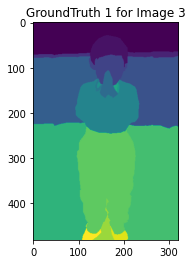

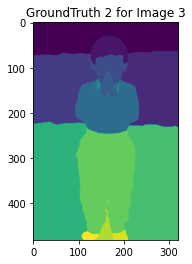

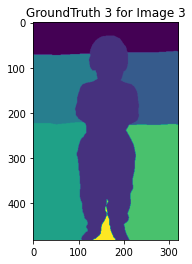

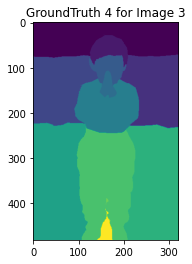

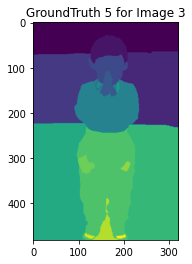

In [ ]:
plt.imshow(ColorizedImages[2].reshape(481,321,3));
plt.title("Clustering for Image 3 at K = 3");
plt.figure();
plt.imshow(ColorizedImages[7].reshape(481,321,3));
plt.title("Clustering for Image 3 at K = 5");
plt.figure();
plt.imshow(ColorizedImages[12].reshape(481,321,3));
plt.title("Clustering for Image 3 at K = 7");
plt.figure();
plt.imshow(ColorizedImages[17].reshape(481,321,3));
plt.title("Clustering for Image 3 at K = 9");
plt.figure();
plt.imshow(ColorizedImages[22].reshape(481,321,3));
plt.title("Clustering for Image 3 at K =11 ");
plt.figure();
plt.imshow(GroundTruth[10]);
plt.title("GroundTruth 1 for Image 3");
plt.figure();
plt.imshow(GroundTruth[11]);
plt.title("GroundTruth 2 for Image 3");
plt.figure();
plt.imshow(GroundTruth[12]);
plt.title("GroundTruth 3 for Image 3");
plt.figure();
plt.imshow(GroundTruth[13]);
plt.title("GroundTruth 4 for Image 3");
plt.figure();
plt.imshow(GroundTruth[14]);
plt.title("GroundTruth 5 for Image 3");

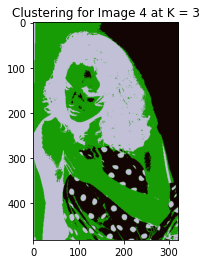

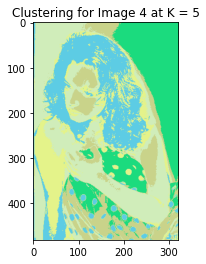

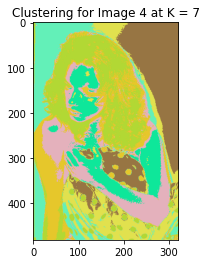

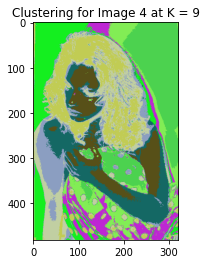

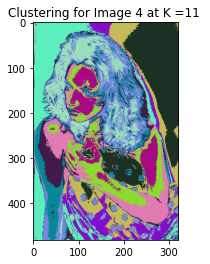

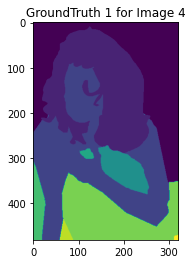

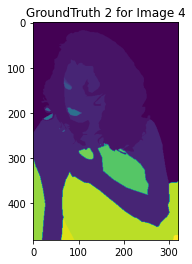

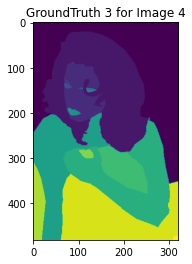

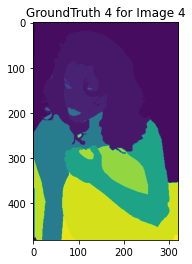

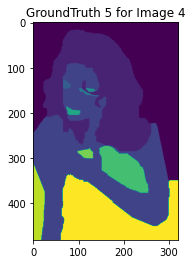

In [ ]:
plt.imshow(ColorizedImages[3].reshape(481,321,3));
plt.title("Clustering for Image 4 at K = 3");  
plt.figure();
plt.imshow(ColorizedImages[8].reshape(481,321,3));
plt.title("Clustering for Image 4 at K = 5");
plt.figure();
plt.imshow(ColorizedImages[13].reshape(481,321,3));
plt.title("Clustering for Image 4 at K = 7");
plt.figure();
plt.imshow(ColorizedImages[18].reshape(481,321,3));
plt.title("Clustering for Image 4 at K = 9");
plt.figure();
plt.imshow(ColorizedImages[23].reshape(481,321,3));
plt.title("Clustering for Image 4 at K =11 ");
plt.figure();
plt.imshow(GroundTruth[17]);
plt.title("GroundTruth 1 for Image 4");
plt.figure();
plt.imshow(GroundTruth[18]);
plt.title("GroundTruth 2 for Image 4");
plt.figure();
plt.imshow(GroundTruth[19]);
plt.title("GroundTruth 3 for Image 4");
plt.figure();
plt.imshow(GroundTruth[20]);
plt.title("GroundTruth 4 for Image 4");
plt.figure();
plt.imshow(GroundTruth[21]);
plt.title("GroundTruth 5 for Image 4");

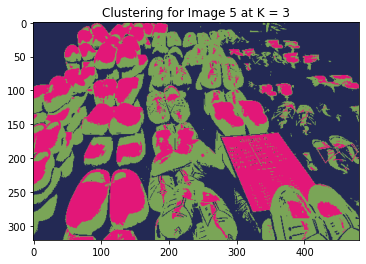

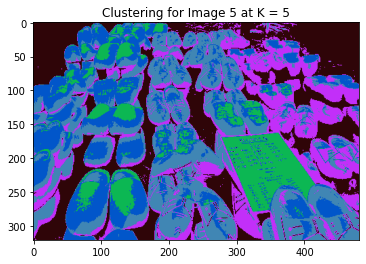

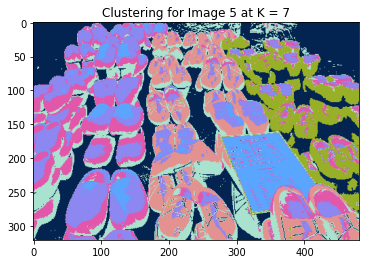

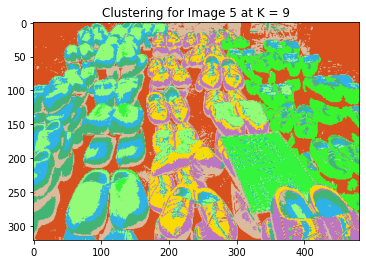

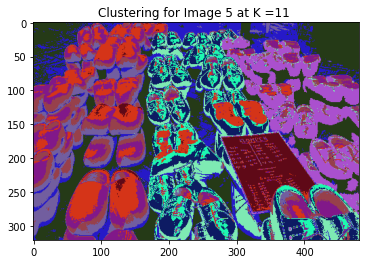

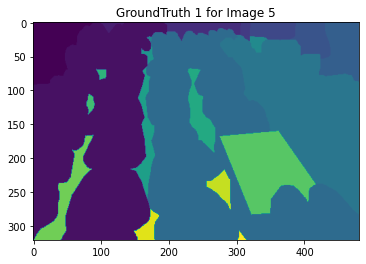

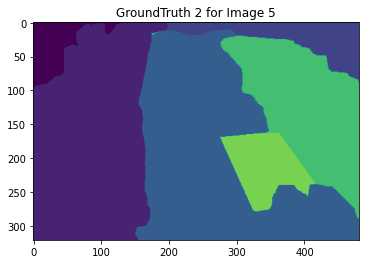

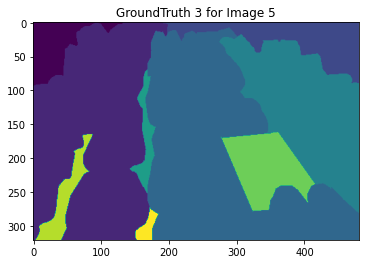

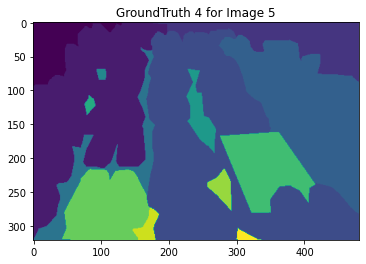

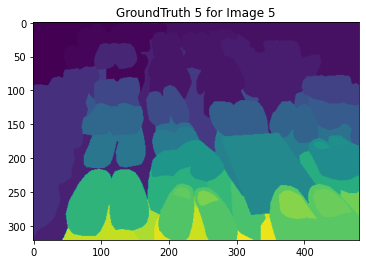

In [ ]:
plt.imshow(ColorizedImages[4].reshape(321,481,3));
plt.title("Clustering for Image 5 at K = 3");
plt.figure();
plt.imshow(ColorizedImages[9].reshape(321,481,3));
plt.title("Clustering for Image 5 at K = 5");
plt.figure();
plt.imshow(ColorizedImages[14].reshape(321,481,3));
plt.title("Clustering for Image 5 at K = 7");
plt.figure();
plt.imshow(ColorizedImages[19].reshape(321,481,3));
plt.title("Clustering for Image 5 at K = 9");
plt.figure();
plt.imshow(ColorizedImages[24].reshape(321,481,3));
plt.title("Clustering for Image 5 at K =11 ");
plt.figure();
plt.imshow(GroundTruth[22]);
plt.title("GroundTruth 1 for Image 5");
plt.figure();
plt.imshow(GroundTruth[23]);
plt.title("GroundTruth 2 for Image 5");
plt.figure();
plt.imshow(GroundTruth[24]);
plt.title("GroundTruth 3 for Image 5");
plt.figure();
plt.imshow(GroundTruth[25]);
plt.title("GroundTruth 4 for Image 5");
plt.figure();
plt.imshow(GroundTruth[26]);
plt.title("GroundTruth 5 for Image 5");

In [ ]:
def FMeasure(Clusters,Variables):
    FMeasure = 0
    ContingencyTable =contingency_matrix(Clusters,Variables)
    for i in range(ContingencyTable.shape[0]):
        SummationOverColumns = 0
        Precision = ContingencyTable.max(axis=1)[i] / np.sum(ContingencyTable[i])
        MaximumPosition = ContingencyTable.argmax(axis=1)[i]
        for j in range(ContingencyTable.shape[0]):
         SummationOverColumns += ContingencyTable[j][MaximumPosition]
        Recall = ContingencyTable.max(axis=1)[i] / SummationOverColumns
        FMeasure += 2*Precision*Recall / (Precision+Recall)
    return FMeasure/ContingencyTable.shape[0]

For K =  3  and Ground Truth Image =  1  F-Measure is  0.733609265856848
For K =  3  and Ground Truth Image =  2  F-Measure is  0.7295116629968853
For K =  3  and Ground Truth Image =  3  F-Measure is  0.7302320535106962
For K =  3  and Ground Truth Image =  4  F-Measure is  0.7497413292857241
For K =  3  and Ground Truth Image =  5  F-Measure is  0.7275946767018934
For K =  5  and Ground Truth Image =  1  F-Measure is  0.4912085358951834
For K =  5  and Ground Truth Image =  2  F-Measure is  0.4887564511051098
For K =  5  and Ground Truth Image =  3  F-Measure is  0.4891618523419341
For K =  5  and Ground Truth Image =  4  F-Measure is  0.5001493558707896
For K =  5  and Ground Truth Image =  5  F-Measure is  0.48757425890930106
For K =  7  and Ground Truth Image =  1  F-Measure is  0.4437953671489502
For K =  7  and Ground Truth Image =  2  F-Measure is  0.4339851856086162
For K =  7  and Ground Truth Image =  3  F-Measure is  0.43569961244645333
For K =  7  and Ground Truth Image = 

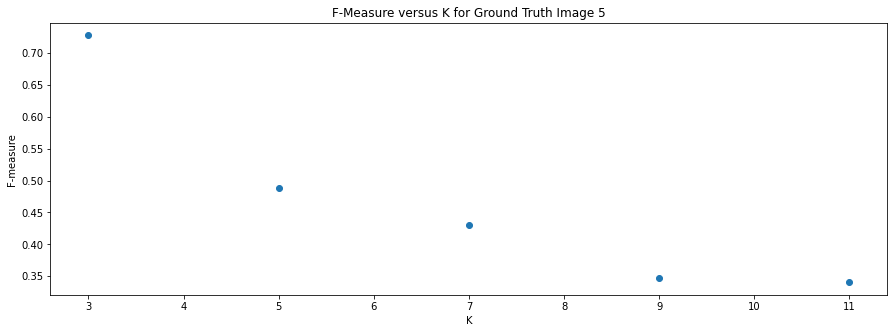

In [ ]:
K = [3,5,7,9,11]
FMeasures = []
Count = 0
for j in range(0,25,5):
    for i in range(0,5):
        GroundTruthImage = GroundTruth[i].reshape(481*321)
        FMeasureValue = FMeasure(Clusters[j],GroundTruthImage)
        print("For K = ",K[Count]," and Ground Truth Image = ",i+1," F-Measure is ",FMeasureValue)
    Count +=1
    FMeasures.append(FMeasureValue)
print("Average of the M trials = ",sum(FMeasures)/len(FMeasures))
plt.scatter(K,FMeasures)
plt.title('F-Measure versus K for Ground Truth Image 5');
plt.gcf().set_size_inches(15,5);
plt.xlabel('K');
plt.ylabel('F-measure');

In [ ]:
def ConditionalEntropy(Clusters,Variables):
    ContingencyTable = contingency_matrix(Clusters, Variables)      
    ConditionalEntropies = []
    for i in range(ContingencyTable.shape[0]):
        ConditionalEntropy = 0
        NumberOfElementsInCluster = np.sum(ContingencyTable[i])
        for j in range(ContingencyTable.shape[1]):
            if(ContingencyTable[i][j] != 0): ConditionalEntropy -= (ContingencyTable[i][j]/NumberOfElementsInCluster) * (np.log2(ContingencyTable[i][j]/NumberOfElementsInCluster))
        ConditionalEntropies.append(ConditionalEntropy*NumberOfElementsInCluster) 
    return sum(ConditionalEntropies)/np.sum(ContingencyTable)

For K =  3  and Ground Truth Image =  1  Conditional Entropy is  0.10152969371736463
For K =  3  and Ground Truth Image =  2  Conditional Entropy is  0.10779588196287074
For K =  3  and Ground Truth Image =  3  Conditional Entropy is  0.10324334469251822
For K =  3  and Ground Truth Image =  4  Conditional Entropy is  0.06480372543451053
For K =  3  and Ground Truth Image =  5  Conditional Entropy is  0.11565521755228422
For K =  5  and Ground Truth Image =  1  Conditional Entropy is  0.09849018683546802
For K =  5  and Ground Truth Image =  2  Conditional Entropy is  0.10470293857867158
For K =  5  and Ground Truth Image =  3  Conditional Entropy is  0.10017939207788484
For K =  5  and Ground Truth Image =  4  Conditional Entropy is  0.062107291192656726
For K =  5  and Ground Truth Image =  5  Conditional Entropy is  0.11198678655047652
For K =  7  and Ground Truth Image =  1  Conditional Entropy is  0.08658652772909427
For K =  7  and Ground Truth Image =  2  Conditional Entropy is 

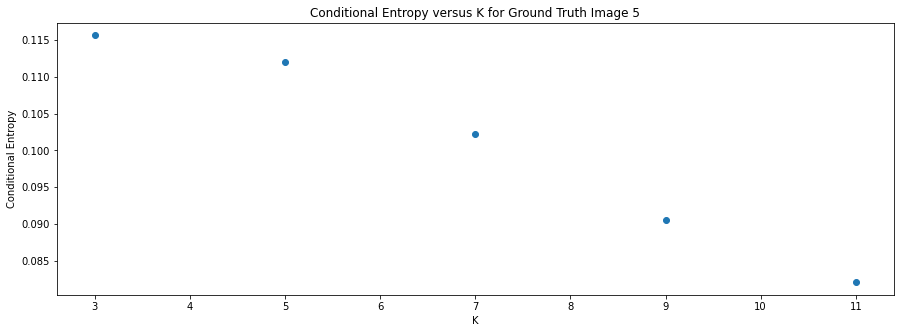

In [ ]:
K = [3,5,7,9,11]
ConditionalEntropies = []
Count=0
for j in range(0,25,5):
    for i in range(0,5):
        GroundTruthImage = GroundTruth[i].reshape(481*321)
        ConditionalEntropyValue = ConditionalEntropy(Clusters[j],GroundTruthImage)
        print("For K = ",K[Count]," and Ground Truth Image = ",i+1," Conditional Entropy is ",ConditionalEntropyValue)
    Count +=1
    ConditionalEntropies.append(ConditionalEntropyValue)
print("Average of the M trials = ",sum(ConditionalEntropies)/len(ConditionalEntropies))
plt.scatter(K,ConditionalEntropies)
plt.title('Conditional Entropy versus K for Ground Truth Image 5');
plt.gcf().set_size_inches(15,5);
plt.xlabel('K');
plt.ylabel('Conditional Entropy');

In [ ]:
SpatialTrain=np.arange(NumOfPixels*NumOfImages*5).reshape(NumOfPixels*NumOfImages,5)
SpatialPosition = []
for i in range(5):
    for j in range(321):
        for k in range(481):
            SpatialPosition.append([j,k])
TrainData = Train[0:NumOfPixels*5]
SpatialTrain =np.hstack([TrainData,SpatialPosition])

In [ ]:
def ColorizeSpatial(Clusters,Image,NumOfClusters):
    ColorizedImages= np.zeros(Image.shape,dtype=np.uint8)
    Colors = []
    for i in range(NumOfClusters):
        Colors.append(np.array([randint(0, 255),randint(0, 255),randint(0, 255)]))
    for i in range(Image.shape[0]):
        ColorizedImages[i] = Colors[Clusters[i]]
    return ColorizedImages

In [ ]:
ColorizedImages = []
Clusters = []
for K in range(3,12,2):  
    for Count in range(5):
        Image = SpatialTrain[NumOfPixels*Count:NumOfPixels+(NumOfPixels*Count)]
        WithoutPosition = SpatialTrain[NumOfPixels*Count:NumOfPixels+(NumOfPixels*Count),0:3]
        #Model = OwnKMeans(Image,K)
        Model = ImplementedKMeans(n_clusters=K, random_state=0).fit(Image)
        Clusters.append(Model.labels_)
        ColorizedImages.append(ColorizeSpatial(Model.labels_,WithoutPosition,K))

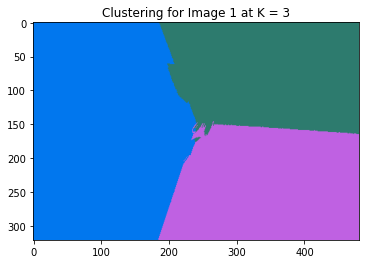

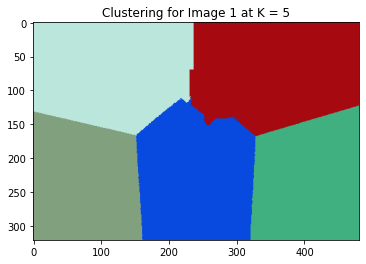

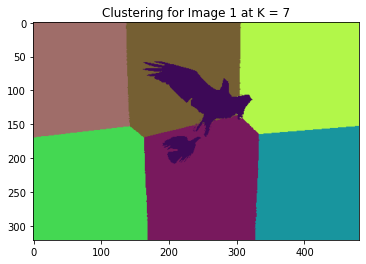

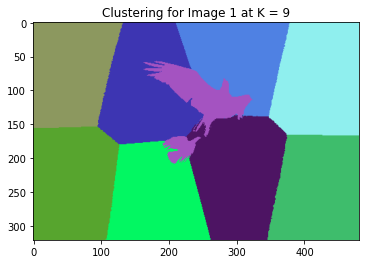

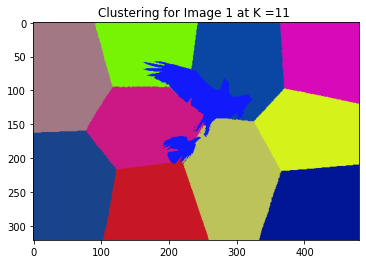

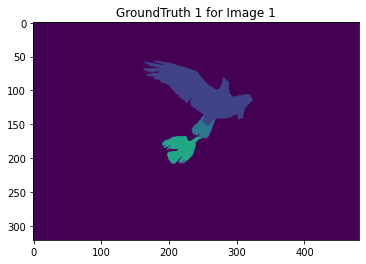

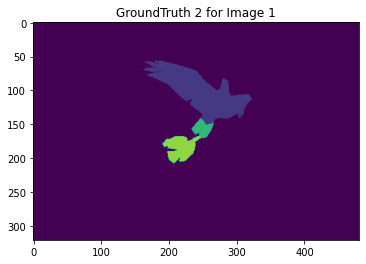

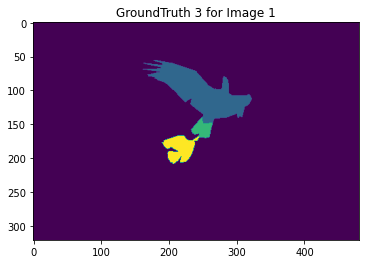

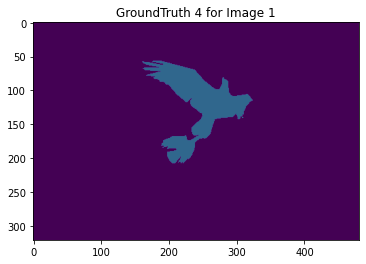

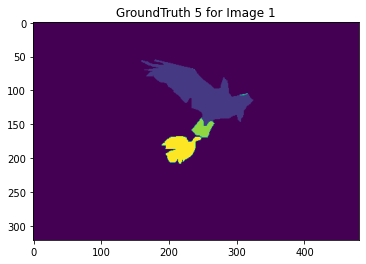

In [ ]:
plt.imshow(ColorizedImages[0].reshape(321,481,3));
plt.title("Clustering for Image 1 at K = 3");
plt.figure();
plt.imshow(ColorizedImages[5].reshape(321,481,3));
plt.title("Clustering for Image 1 at K = 5");
plt.figure();
plt.imshow(ColorizedImages[10].reshape(321,481,3));
plt.title("Clustering for Image 1 at K = 7");
plt.figure();
plt.imshow(ColorizedImages[15].reshape(321,481,3));
plt.title("Clustering for Image 1 at K = 9");
plt.figure();
plt.imshow(ColorizedImages[20].reshape(321,481,3));
plt.title("Clustering for Image 1 at K =11 ");
plt.figure();
plt.imshow(GroundTruth[0]);
plt.title("GroundTruth 1 for Image 1");
plt.figure();
plt.imshow(GroundTruth[1]);
plt.title("GroundTruth 2 for Image 1");
plt.figure();
plt.imshow(GroundTruth[2]);
plt.title("GroundTruth 3 for Image 1");
plt.figure();
plt.imshow(GroundTruth[3]);
plt.title("GroundTruth 4 for Image 1");
plt.figure();
plt.imshow(GroundTruth[4]);
plt.title("GroundTruth 5 for Image 1");

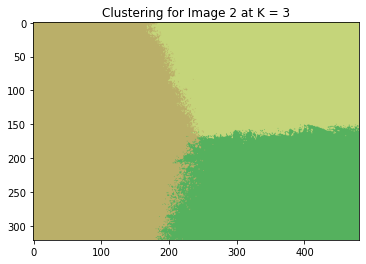

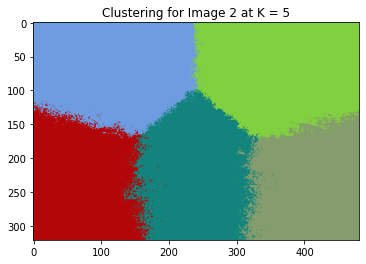

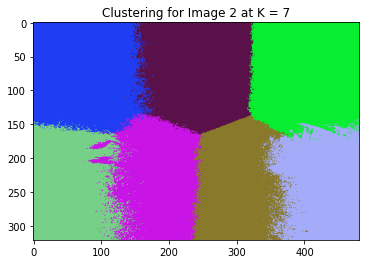

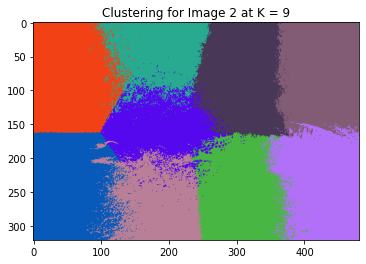

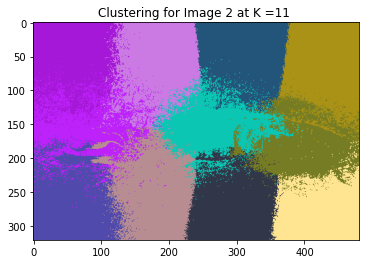

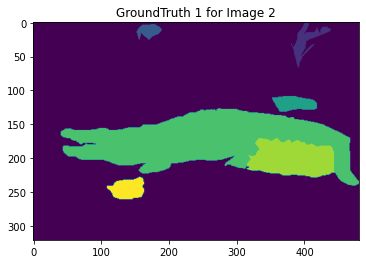

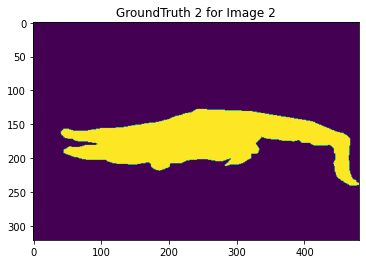

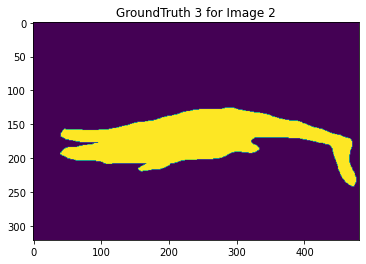

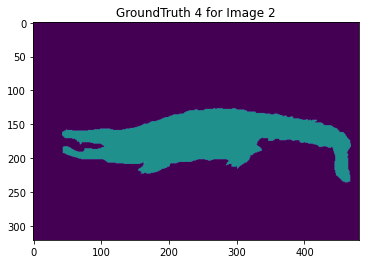

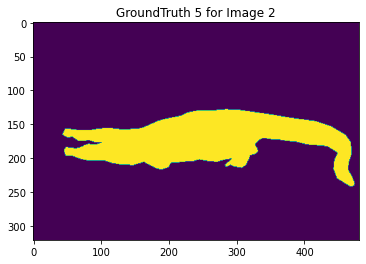

In [ ]:
plt.imshow(ColorizedImages[1].reshape(321,481,3));
plt.title("Clustering for Image 2 at K = 3");
plt.figure();
plt.imshow(ColorizedImages[6].reshape(321,481,3));
plt.title("Clustering for Image 2 at K = 5");
plt.figure();
plt.imshow(ColorizedImages[11].reshape(321,481,3));
plt.title("Clustering for Image 2 at K = 7");
plt.figure();
plt.imshow(ColorizedImages[16].reshape(321,481,3));
plt.title("Clustering for Image 2 at K = 9");
plt.figure();
plt.imshow(ColorizedImages[21].reshape(321,481,3));
plt.title("Clustering for Image 2 at K =11 ");
plt.figure();
plt.imshow(GroundTruth[5]);
plt.title("GroundTruth 1 for Image 2");
plt.figure();
plt.imshow(GroundTruth[6]);
plt.title("GroundTruth 2 for Image 2");
plt.figure();
plt.imshow(GroundTruth[7]);
plt.title("GroundTruth 3 for Image 2");
plt.figure();
plt.imshow(GroundTruth[8]);
plt.title("GroundTruth 4 for Image 2");
plt.figure();
plt.imshow(GroundTruth[9]);
plt.title("GroundTruth 5 for Image 2");

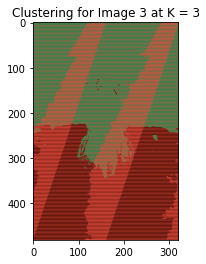

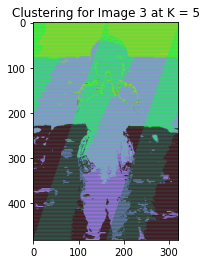

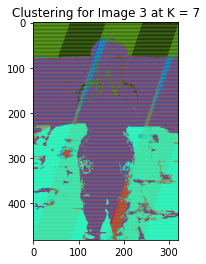

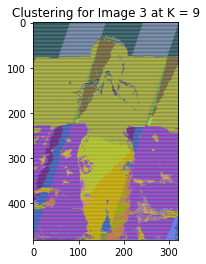

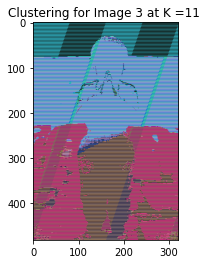

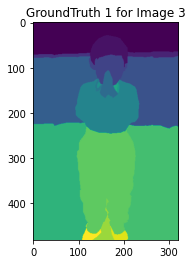

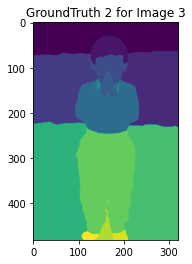

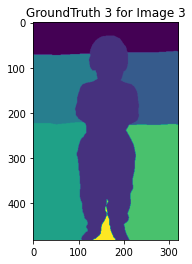

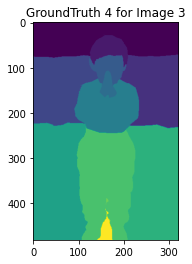

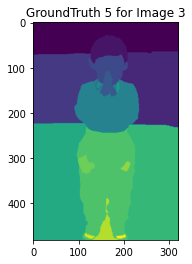

In [ ]:
plt.imshow(ColorizedImages[2].reshape(481,321,3));
plt.title("Clustering for Image 3 at K = 3");
plt.figure();
plt.imshow(ColorizedImages[7].reshape(481,321,3));
plt.title("Clustering for Image 3 at K = 5");
plt.figure();
plt.imshow(ColorizedImages[12].reshape(481,321,3));
plt.title("Clustering for Image 3 at K = 7");
plt.figure();
plt.imshow(ColorizedImages[17].reshape(481,321,3));
plt.title("Clustering for Image 3 at K = 9");
plt.figure();
plt.imshow(ColorizedImages[22].reshape(481,321,3));
plt.title("Clustering for Image 3 at K =11 ");
plt.figure();
plt.imshow(GroundTruth[10]);
plt.title("GroundTruth 1 for Image 3");
plt.figure();
plt.imshow(GroundTruth[11]);
plt.title("GroundTruth 2 for Image 3");
plt.figure();
plt.imshow(GroundTruth[12]);
plt.title("GroundTruth 3 for Image 3");
plt.figure();
plt.imshow(GroundTruth[13]);
plt.title("GroundTruth 4 for Image 3");
plt.figure();
plt.imshow(GroundTruth[14]);
plt.title("GroundTruth 5 for Image 3");

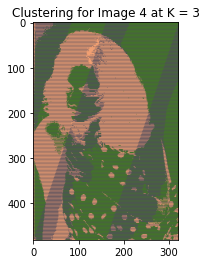

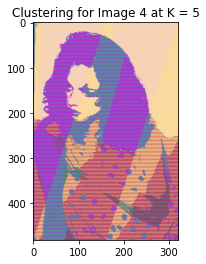

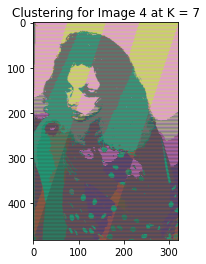

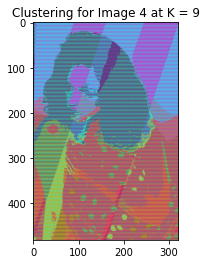

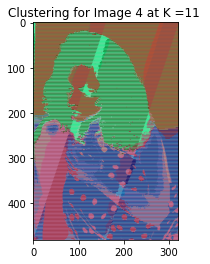

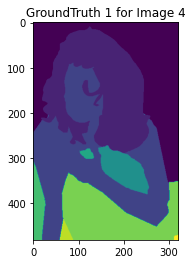

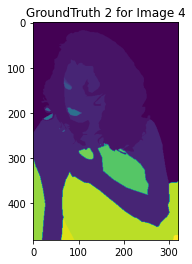

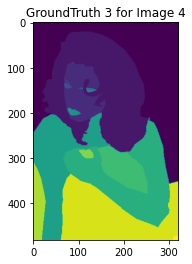

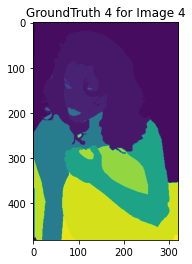

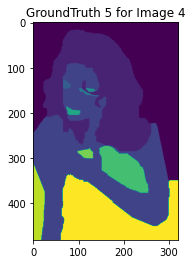

In [ ]:
plt.imshow(ColorizedImages[3].reshape(481,321,3));
plt.title("Clustering for Image 4 at K = 3");
plt.figure();
plt.imshow(ColorizedImages[8].reshape(481,321,3));
plt.title("Clustering for Image 4 at K = 5");
plt.figure();
plt.imshow(ColorizedImages[13].reshape(481,321,3));
plt.title("Clustering for Image 4 at K = 7");
plt.figure();
plt.imshow(ColorizedImages[18].reshape(481,321,3));
plt.title("Clustering for Image 4 at K = 9");
plt.figure();
plt.imshow(ColorizedImages[23].reshape(481,321,3));
plt.title("Clustering for Image 4 at K =11 ");
plt.figure();
plt.imshow(GroundTruth[17]);
plt.title("GroundTruth 1 for Image 4");
plt.figure();
plt.imshow(GroundTruth[18]);
plt.title("GroundTruth 2 for Image 4");
plt.figure();
plt.imshow(GroundTruth[19]);
plt.title("GroundTruth 3 for Image 4");
plt.figure();
plt.imshow(GroundTruth[20]);
plt.title("GroundTruth 4 for Image 4");
plt.figure();
plt.imshow(GroundTruth[21]);
plt.title("GroundTruth 5 for Image 4");

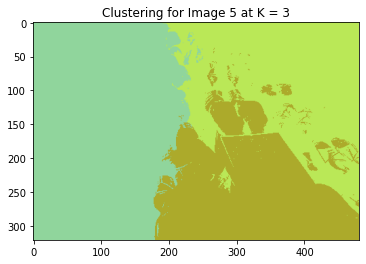

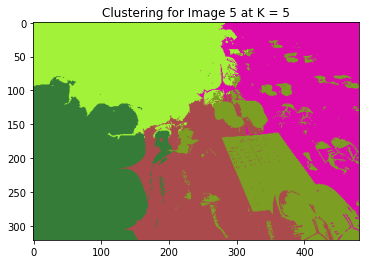

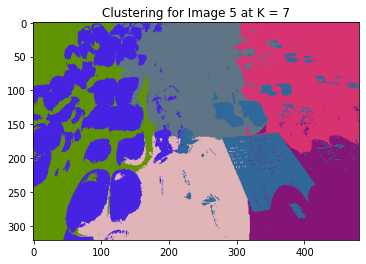

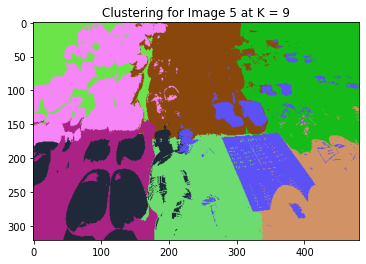

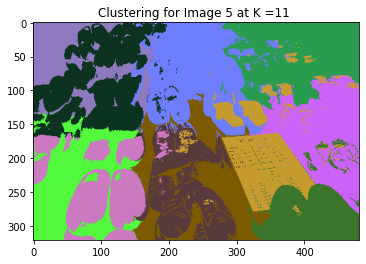

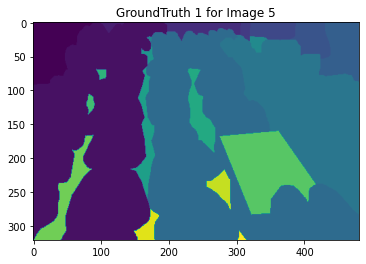

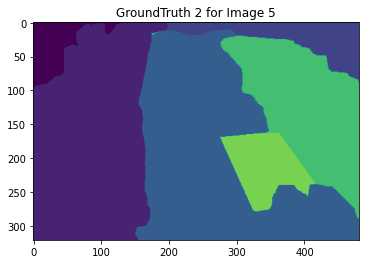

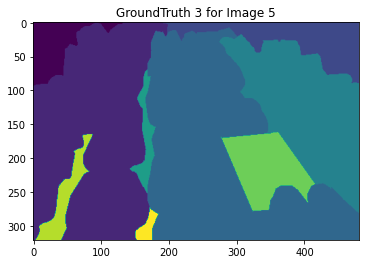

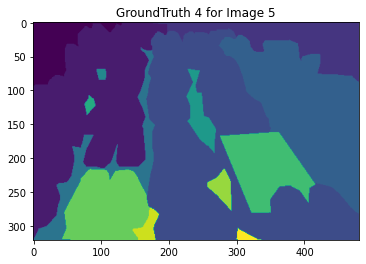

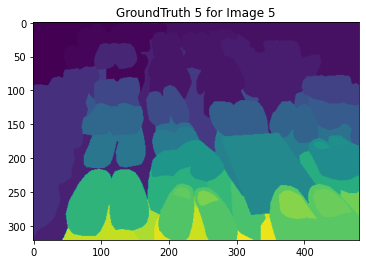

In [ ]:
plt.imshow(ColorizedImages[4].reshape(321,481,3));
plt.title("Clustering for Image 5 at K = 3");
plt.figure();
plt.imshow(ColorizedImages[9].reshape(321,481,3));
plt.title("Clustering for Image 5 at K = 5");
plt.figure();
plt.imshow(ColorizedImages[14].reshape(321,481,3));
plt.title("Clustering for Image 5 at K = 7");
plt.figure();
plt.imshow(ColorizedImages[19].reshape(321,481,3));
plt.title("Clustering for Image 5 at K = 9");
plt.figure();
plt.imshow(ColorizedImages[24].reshape(321,481,3));
plt.title("Clustering for Image 5 at K =11 ");
plt.figure();
plt.imshow(GroundTruth[22]);
plt.title("GroundTruth 1 for Image 5");
plt.figure();
plt.imshow(GroundTruth[23]);
plt.title("GroundTruth 2 for Image 5");
plt.figure();
plt.imshow(GroundTruth[24]);
plt.title("GroundTruth 3 for Image 5");
plt.figure();
plt.imshow(GroundTruth[25]);
plt.title("GroundTruth 4 for Image 5");
plt.figure();
plt.imshow(GroundTruth[26]);
plt.title("GroundTruth 5 for Image 5");